In [53]:
import os
import sys
import scipy.misc
import scipy.io
from nst_utils import *
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def compute_content_cost(a_C, a_G):
    
    # Retrieve dimensions from a_G (≈1 line)
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    
    # Reshape a_C and a_G (≈2 lines)
    a_C_unrolled = tf.reshape(a_C,(1,n_H*n_W,n_C))
    a_G_unrolled = tf.reshape(a_G,(1,n_H*n_W,n_C))
    
    # compute the cost with tensorflow (≈1 line)
    J_content = (1/(4*n_H*n_W*n_C))*tf.reduce_sum(tf.square(tf.subtract(a_C_unrolled,a_G_unrolled)))
    
    
    return J_content

In [ ]:
# GRADED FUNCTION: compute_layer_style_cost

def compute_layer_style_cost(a_S, a_G):
    """
    Arguments:
    a_S -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing style of the image S 
    a_G -- tensor of dimension (1, n_H, n_W, n_C), hidden layer activations representing style of the image G
    
    Returns: 
    J_style_layer -- tensor representing a scalar value, style cost defined above by equation (2)
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from a_G (≈1 line)
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    
    # Reshape the images to have them of shape (n_C, n_H*n_W) (≈2 lines)
    a_S = tf.transpose(tf.reshape(a_S, [n_H*n_W, n_C]))
    a_G = tf.transpose(tf.reshape(a_G, [n_H*n_W, n_C]))

    # Computing gram_matrices for both images S and G (≈2 lines)
    GS = tf.matmul(a_S,tf.transpose(a_S))
    GG = tf.matmul(a_G,tf.transpose(a_G))

    # Computing the loss (≈1 line)
    J_style_layer = (1./(4 * n_C**2 * (n_H*n_W)**2)) * tf.reduce_sum(tf.pow((GS - GG), 2))
    #J_style_layer = (1/(4*(n_C*n_C)*(n_H*n_W*n_H*n_W)))*tf.reduce_sum(tf.reduce_sum(tf.square(tf.subtract(GS,GG))))
    
    ### END CODE HERE ###
    
    return J_style_layer

Steps involved in implementing Neural Style Transfer!



<font color='red'>

1. Create an Interactive Session
2. Load the content image 
3. Load the style image
4. Randomly initialize the image to be generated 
5. Load the VGG16 model
7. Build the TensorFlow graph:
    - Run the content image through the VGG16 model and compute the content cost
    - Run the style image through the VGG16 model and compute the style cost
    - Compute the total cost
    - Define the optimizer and the learning rate
8. Initialize the TensorFlow graph and run it for a large number of iterations, updating the generated image at every step.

</font>
Lets Start 

In [32]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

d:\anaconda\envs\mywindowscv\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


d:\anaconda\envs\mywindowscv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


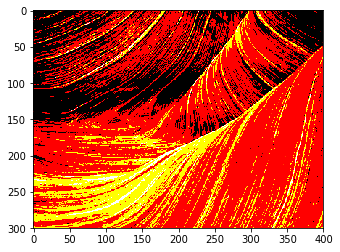

In [69]:
content_image = scipy.misc.imread('sandstone.jpg')
content_image = reshape_and_normalize_image(content_image)
imshow(content_image[0])

d:\anaconda\envs\mywindowscv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


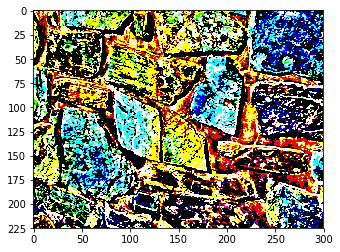

In [51]:
style_image = scipy.misc.imread('stone_style.jpg')
style_image = reshape_and_normalize_image(style_image)
imshow(style_image[0])

In [68]:
from nst_utils import *

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


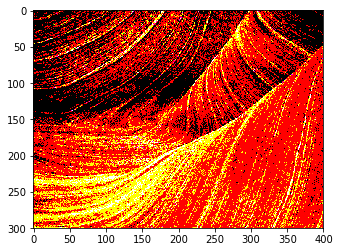

In [70]:
generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [37]:
model = load_vgg_model("pretrained-model/imagenet-vgg-verydeep-19.mat")